In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# reading in oecd df
oecd_data = pd.read_csv("oecd.csv")
pivot_df = oecd_data.pivot(columns='Indicator', values='Value')
merged_df = oecd_data.merge(pivot_df, left_index=True, right_index=True)
merged_df.columns
aggregation_func = {}
for column in oecd_data['Indicator'].unique():
    aggregation_func[column] = 'first'
oecd_df = merged_df.groupby('Country').agg(aggregation_func).reset_index()

In [20]:
#impute the missing data based on worldwide averages
oecd_df = oecd_df.fillna(merged_df.mean())
oecd_df


,Country,Labour market insecurity,Stakeholder engagement for developing regulations,Dwellings without basic facilities,Housing expenditure,Feeling safe walking alone at night,Rooms per person,Household net adjusted disposable income,Household net wealth,Employment rate,...,Years in education,Air pollution,Water quality,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care
0,Australia,3.10,2.70,4.261538,19.40,67.0,1.658974,37433.000000,528768.000000,73.0,...,20.000000,6.7,92.0,92.0,83.0,85.000000,7.1,0.9,12.500000,14.360000
1,Austria,2.30,1.30,0.800000,20.80,86.0,1.600000,37001.000000,309637.000000,72.0,...,17.000000,12.2,92.0,76.0,82.0,71.000000,7.2,0.5,5.300000,14.510000
2,Belgium,2.40,2.00,0.700000,20.00,56.0,2.100000,34884.000000,447607.000000,65.0,...,19.000000,12.8,79.0,88.0,82.1,74.000000,6.8,1.1,4.300000,15.520000
3,Brazil,5.18,2.20,6.700000,20.35,45.0,1.658974,29598.583333,323959.633333,57.0,...,16.000000,11.7,70.0,80.0,75.9,68.309278,6.1,19.0,5.600000,15.035217
4,Canada,3.80,2.90,0.200000,22.90,78.0,2.600000,34421.000000,478240.000000,70.0,...,17.000000,7.1,90.0,68.0,82.1,89.000000,7.0,1.2,3.300000,14.570000
5,Chile,7.00,1.30,9.400000,18.40,41.0,1.900000,29598.583333,135787.000000,56.0,...,17.000000,23.4,62.0,47.0,80.6,60.000000,6.2,2.4,7.700000,15.035217
6,Colombia,5.18,1.40,12.300000,20.35,50.0,1.000000,29598.583333,323959.633333,58.0,...,14.000000,22.6,82.0,53.0,76.7,80.000000,5.7,23.1,23.700000,15.035217
7,Costa Rica,5.18,1.80,2.300000,17.00,47.0,1.200000,16517.000000,323959.633333,55.0,...,17.508333,17.5,87.0,66.0,80.5,73.000000,6.3,10.0,22.000000,15.035217
8,Czechia,2.30,1.60,0.500000,23.40,77.0,1.500000,26664.000000,323959.633333,74.0,...,18.000000,17.0,89.0,62.0,79.3,62.000000,6.9,0.7,4.500000,15.035217
9,Denmark,4.50,2.00,0.500000,23.30,85.0,1.900000,33774.000000,149864.000000,74.0,...,19.000000,10.0,93.0,85.0,81.5,70.000000,7.5,0.5,1.100000,15.035217


/Users/justinshan/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Labour market insecurity'}>,
        <AxesSubplot:title={'center':'Stakeholder engagement for developing regulations'}>,
        <AxesSubplot:title={'center':'Dwellings without basic facilities'}>,
        <AxesSubplot:title={'center':'Housing expenditure'}>,
        <AxesSubplot:title={'center':'Feeling safe walking alone at night'}>],
       [<AxesSubplot:title={'center':'Rooms per person'}>,
        <AxesSubplot:title={'center':'Household net adjusted disposable income'}>,
        <AxesSubplot:title={'center':'Household net wealth'}>,
        <AxesSubplot:title={'center':'Employment rate'}>,
        <AxesSubplot:title={'center':'Long-term unemployment rate'}>],
       [<AxesSubplot:title={'center':'Personal earnings'}>,
        <AxesSubplot:title={'center':'Quality of support network'}>,
        <AxesSubplot:title={'center':'Educational attainment'}>,
        <AxesSubplot:title={'center':'Student skills'}>,
        <AxesSubplot:title={'center':'

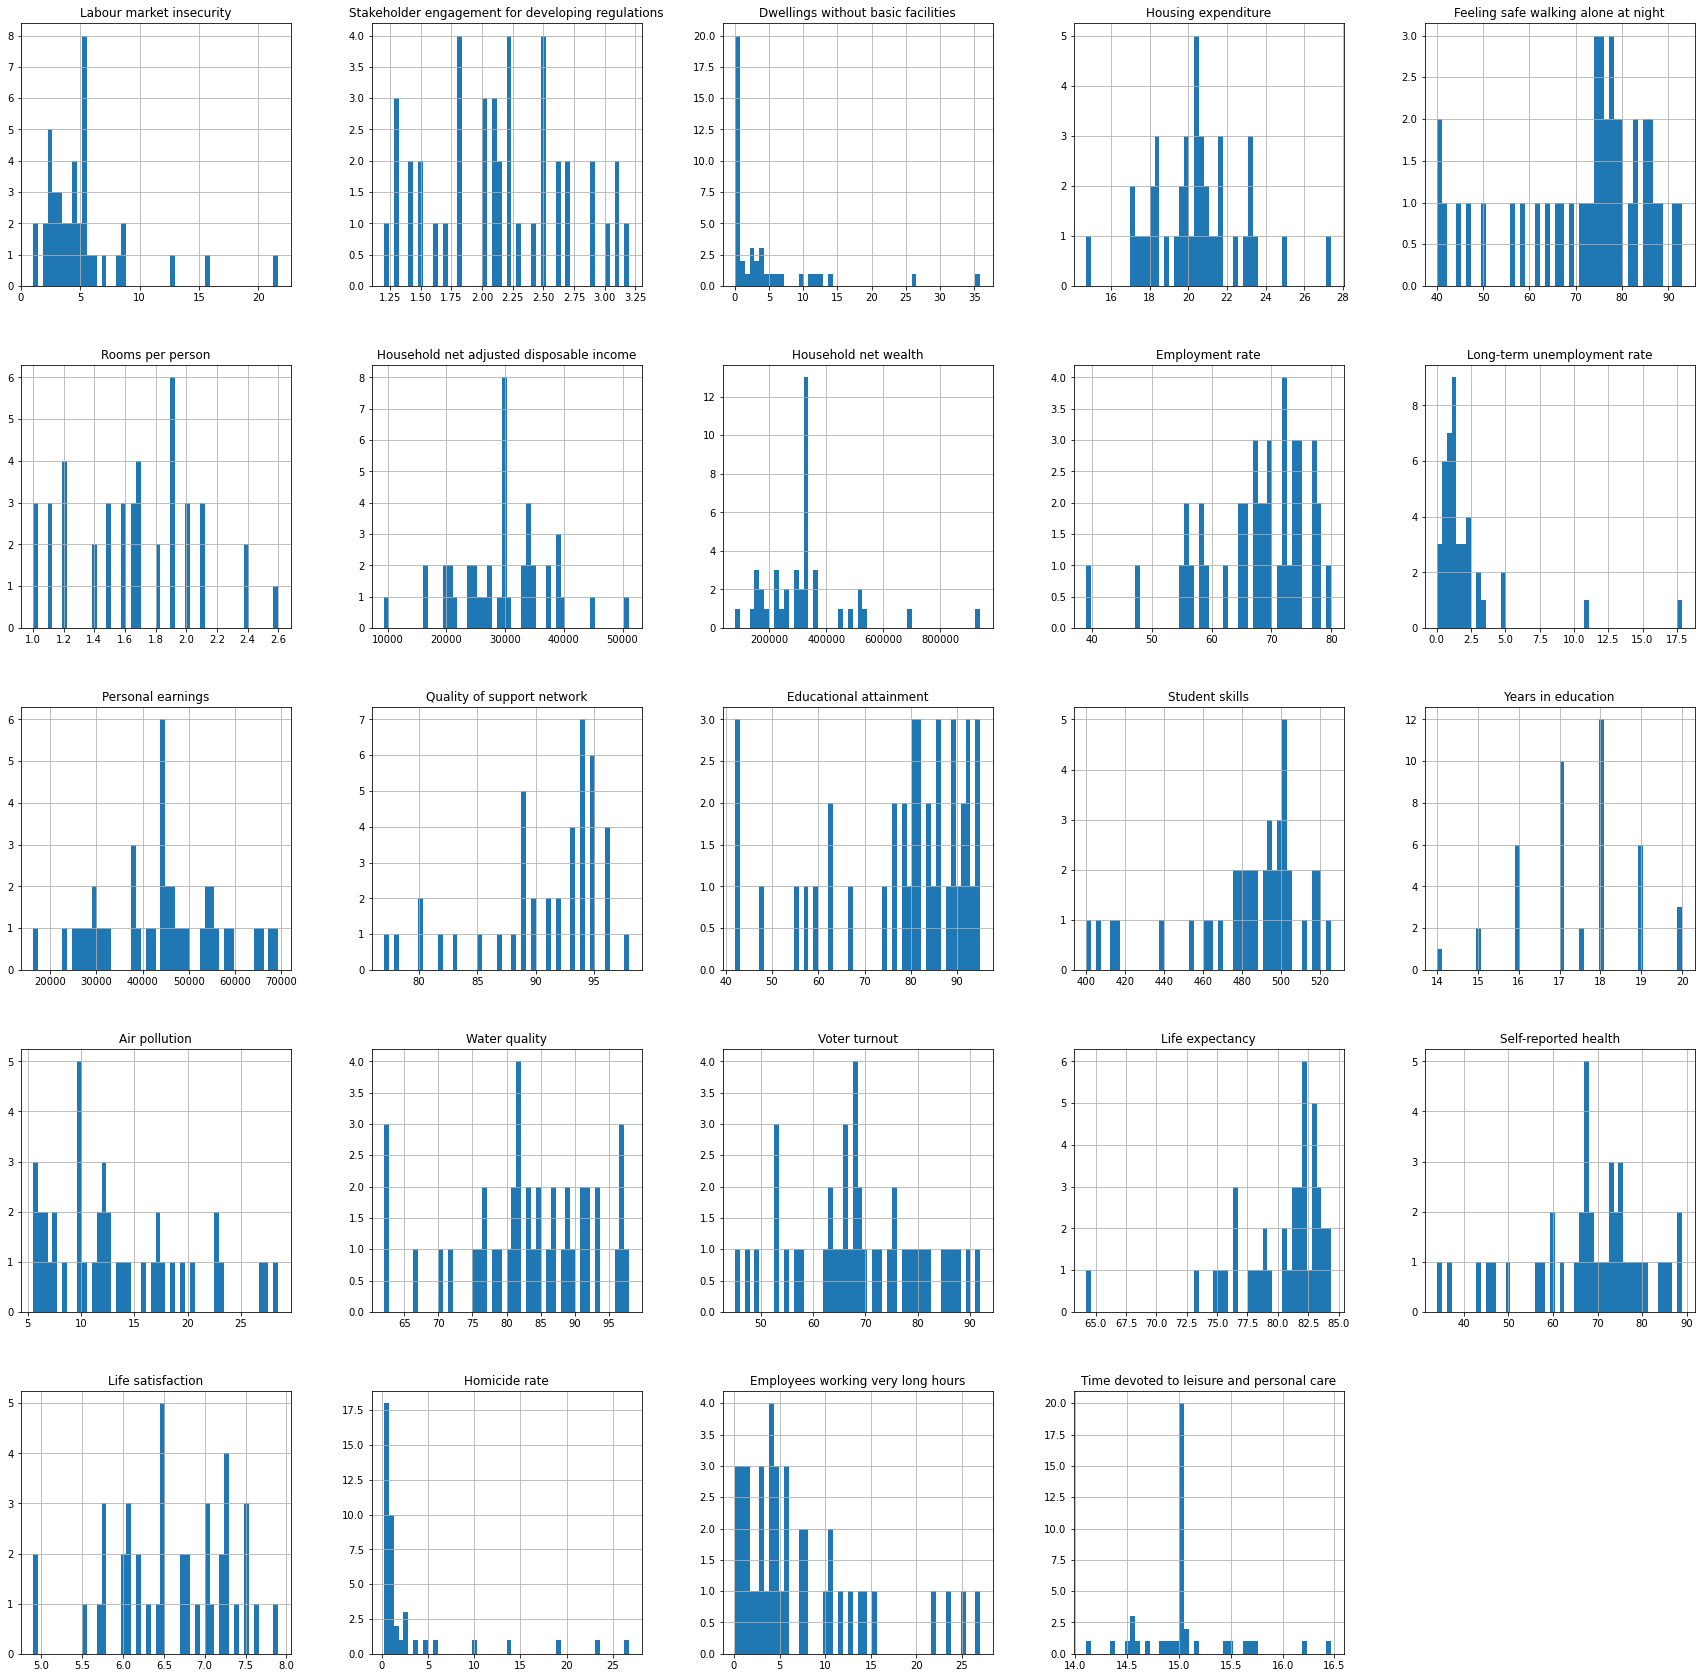

In [21]:
#plot histograms of all features
oecd_df.hist(bins=50, figsize=(30,30))

In [22]:
# read democracy index data
di_data = pd.read_csv('dem_index.csv')
#filter for 2022 data
di22_data = di_data[di_data['Year'] == 2022]
#merge with oecd
merged_df =  pd.merge(oecd_df, di22_data, left_on='Country', right_on='Entity', how='inner')
merged_df.drop(['Entity', 'Code', 'Year'], axis=1)
merged_df = merged_df.rename(columns={'democracy_eiu': 'dem_index'})
merged_df

,Country,Labour market insecurity,Stakeholder engagement for developing regulations,Dwellings without basic facilities,Housing expenditure,Feeling safe walking alone at night,Rooms per person,Household net adjusted disposable income,Household net wealth,Employment rate,...,Life expectancy,Self-reported health,Life satisfaction,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care,Entity,Code,Year,dem_index
0,Australia,3.10,2.70,4.261538,19.40,67.0,1.658974,37433.000000,528768.000000,73.0,...,83.0,85.000000,7.1,0.9,12.500000,14.360000,Australia,AUS,2022,8.71
1,Austria,2.30,1.30,0.800000,20.80,86.0,1.600000,37001.000000,309637.000000,72.0,...,82.0,71.000000,7.2,0.5,5.300000,14.510000,Austria,AUT,2022,8.20
2,Belgium,2.40,2.00,0.700000,20.00,56.0,2.100000,34884.000000,447607.000000,65.0,...,82.1,74.000000,6.8,1.1,4.300000,15.520000,Belgium,BEL,2022,7.64
3,Brazil,5.18,2.20,6.700000,20.35,45.0,1.658974,29598.583333,323959.633333,57.0,...,75.9,68.309278,6.1,19.0,5.600000,15.035217,Brazil,BRA,2022,6.78
4,Canada,3.80,2.90,0.200000,22.90,78.0,2.600000,34421.000000,478240.000000,70.0,...,82.1,89.000000,7.0,1.2,3.300000,14.570000,Canada,CAN,2022,8.88
5,Chile,7.00,1.30,9.400000,18.40,41.0,1.900000,29598.583333,135787.000000,56.0,...,80.6,60.000000,6.2,2.4,7.700000,15.035217,Chile,CHL,2022,8.22
6,Colombia,5.18,1.40,12.300000,20.35,50.0,1.000000,29598.583333,323959.633333,58.0,...,76.7,80.000000,5.7,23.1,23.700000,15.035217,Colombia,COL,2022,6.72
7,Costa Rica,5.18,1.80,2.300000,17.00,47.0,1.200000,16517.000000,323959.633333,55.0,...,80.5,73.000000,6.3,10.0,22.000000,15.035217,Costa Rica,CRI,2022,8.29
8,Czechia,2.30,1.60,0.500000,23.40,77.0,1.500000,26664.000000,323959.633333,74.0,...,79.3,62.000000,6.9,0.7,4.500000,15.035217,Czechia,CZE,2022,7.97
9,Denmark,4.50,2.00,0.500000,23.30,85.0,1.900000,33774.000000,149864.000000,74.0,...,81.5,70.000000,7.5,0.5,1.100000,15.035217,Denmark,DNK,2022,9.28


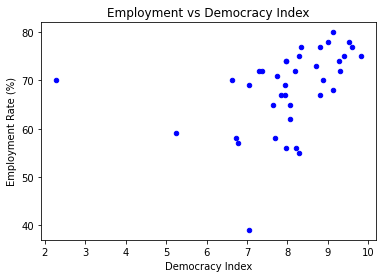

In [23]:
merged_df.plot.scatter(x='dem_index', y='Employment rate', color='blue', marker='o')

# Add labels and title
plt.xlabel('Democracy Index')
plt.ylabel('Employment Rate (%)')
plt.title('Employment vs Democracy Index')

# Display the plot
plt.show()

In [34]:
# read happiness index data
hap_data = pd.read_excel('happiness_index.xls')
hap_data
# merge with oecd+dem_index
merged_df =  pd.merge(merged_df, hap_data[['Country name', 'Ladder score']], left_on='Country', right_on='Country name', how='inner')
merged_df

,Country,Labour market insecurity,Stakeholder engagement for developing regulations,Dwellings without basic facilities,Housing expenditure,Feeling safe walking alone at night,Rooms per person,Household net adjusted disposable income,Household net wealth,Employment rate,...,Country name_x,Ladder score_x,Country name_y,Ladder score_y,Country name_x,Ladder score_x,Country name_y,Ladder score_y,Country name,Ladder score
0,Australia,3.10,2.70,4.261538,19.40,67.0,1.658974,37433.000000,528768.000000,73.0,...,Australia,7.0569,Australia,7.0569,Australia,7.0569,Australia,7.0569,Australia,7.0569
1,Austria,2.30,1.30,0.800000,20.80,86.0,1.600000,37001.000000,309637.000000,72.0,...,Austria,6.9047,Austria,6.9047,Austria,6.9047,Austria,6.9047,Austria,6.9047
2,Belgium,2.40,2.00,0.700000,20.00,56.0,2.100000,34884.000000,447607.000000,65.0,...,Belgium,6.8942,Belgium,6.8942,Belgium,6.8942,Belgium,6.8942,Belgium,6.8942
3,Brazil,5.18,2.20,6.700000,20.35,45.0,1.658974,29598.583333,323959.633333,57.0,...,Brazil,6.2720,Brazil,6.2720,Brazil,6.2720,Brazil,6.2720,Brazil,6.2720
4,Canada,3.80,2.90,0.200000,22.90,78.0,2.600000,34421.000000,478240.000000,70.0,...,Canada,6.8996,Canada,6.8996,Canada,6.8996,Canada,6.8996,Canada,6.8996
5,Chile,7.00,1.30,9.400000,18.40,41.0,1.900000,29598.583333,135787.000000,56.0,...,Chile,6.3603,Chile,6.3603,Chile,6.3603,Chile,6.3603,Chile,6.3603
6,Colombia,5.18,1.40,12.300000,20.35,50.0,1.000000,29598.583333,323959.633333,58.0,...,Colombia,5.6951,Colombia,5.6951,Colombia,5.6951,Colombia,5.6951,Colombia,5.6951
7,Costa Rica,5.18,1.80,2.300000,17.00,47.0,1.200000,16517.000000,323959.633333,55.0,...,Costa Rica,6.9554,Costa Rica,6.9554,Costa Rica,6.9554,Costa Rica,6.9554,Costa Rica,6.9554
8,Czechia,2.30,1.60,0.500000,23.40,77.0,1.500000,26664.000000,323959.633333,74.0,...,Czechia,6.8218,Czechia,6.8218,Czechia,6.8218,Czechia,6.8218,Czechia,6.8218
9,Denmark,4.50,2.00,0.500000,23.30,85.0,1.900000,33774.000000,149864.000000,74.0,...,Denmark,7.5827,Denmark,7.5827,Denmark,7.5827,Denmark,7.5827,Denmark,7.5827


In [66]:
# First dependent variable, Homicide rate
import statsmodels.api as sm

# Step 2: Load your dataframe
# Assuming your dataframe is named 'df'
# Example:
# df = pd.read_csv('your_dataframe.csv')

# Step 3: Specify the regression model
# 'happiness_index' is the dependent variable and 'homicide_rate' is the independent variable
X = merged_df['Water quality']  # Independent variable
y = merged_df['Ladder score']  # Dependent variable
X = sm.add_constant(X)  # Add a constant to the independent variable

# Step 4: Fit the model
model = sm.OLS(y, X).fit()

# Step 5: Print out the summary statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     27.79
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           6.53e-06
Time:                        13:41:35   Log-Likelihood:                -19.768
No. Observations:                  38   AIC:                             43.54
Df Residuals:                      36   BIC:                             46.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4673      0.615      5.637

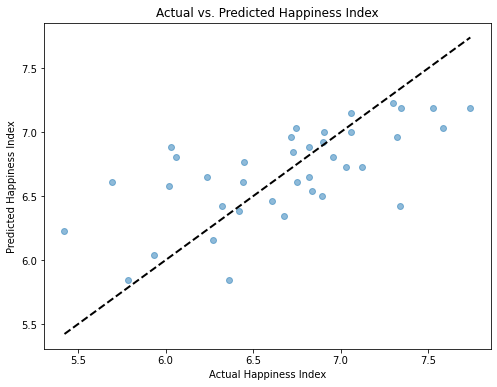

Correlation coefficient: 0.6600651839559832
P-value: 6.528219920611729e-06


In [67]:
# Plot predictions

# Step 5: Generate predictions
predictions = model.predict(X)

# Step 6: Plot predictions versus actual datapoints
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, alpha=0.5)  # Scatter plot of actual vs. predicted
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Add a diagonal line for reference
plt.title('Actual vs. Predicted Happiness Index')
plt.xlabel('Actual Happiness Index')
plt.ylabel('Predicted Happiness Index')
plt.show()

from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(y, predictions)

print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)


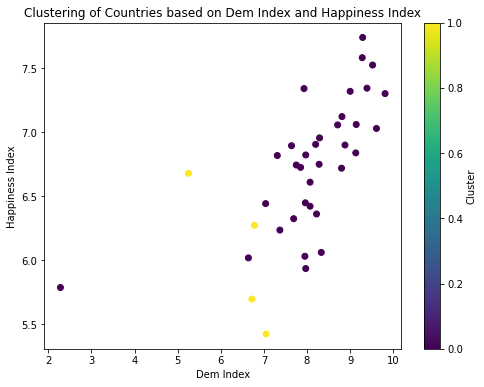

In [129]:
# k-means clustering
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataframe
# Assuming your dataframe is named 'df'
# Example:
# df = pd.read_csv('your_dataframe.csv')

# Select features for clustering
X = merged_df[['Homicide rate', 'Ladder score']]

# Data Preprocessing (if necessary)
# For K-means, it's often recommended to scale or normalize the features
# Example:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Choose the number of clusters
n_clusters = 2

# Fit K-means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Predict cluster labels
cluster_labels = kmeans.predict(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['dem_index'], merged_df['Ladder score'], c=cluster_labels, cmap='viridis')
plt.xlabel('Dem Index')
plt.ylabel('Happiness Index')
plt.title('Clustering of Countries based on Dem Index and Happiness Index')
plt.colorbar(label='Cluster')
plt.show()


In [53]:
# merged_df.drop(['Code', 'Entity', 'Year', 'Country name_x', 'Ladder score_x', 'Country name_y', 'Ladder score_y'], axis=1, inplace=True)
X_vals = list(merged_df.columns)
X_vals = X_vals[1:]
X_vals = X_vals[:-2]
print(X_vals)
merged_df

['Labour market insecurity', 'Stakeholder engagement for developing regulations', 'Dwellings without basic facilities', 'Housing expenditure', 'Feeling safe walking alone at night', 'Rooms per person', 'Household net adjusted disposable income', 'Household net wealth', 'Employment rate', 'Long-term unemployment rate', 'Personal earnings', 'Quality of support network', 'Educational attainment', 'Student skills', 'Years in education', 'Air pollution', 'Water quality', 'Voter turnout', 'Life expectancy', 'Self-reported health', 'Life satisfaction', 'Homicide rate', 'Employees working very long hours', 'Time devoted to leisure and personal care', 'dem_index']


,Country,Labour market insecurity,Stakeholder engagement for developing regulations,Dwellings without basic facilities,Housing expenditure,Feeling safe walking alone at night,Rooms per person,Household net adjusted disposable income,Household net wealth,Employment rate,...,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care,dem_index,Country name,Ladder score
0,Australia,3.10,2.70,4.261538,19.40,67.0,1.658974,37433.000000,528768.000000,73.0,...,92.0,83.0,85.000000,7.1,0.9,12.500000,14.360000,8.71,Australia,7.0569
1,Austria,2.30,1.30,0.800000,20.80,86.0,1.600000,37001.000000,309637.000000,72.0,...,76.0,82.0,71.000000,7.2,0.5,5.300000,14.510000,8.20,Austria,6.9047
2,Belgium,2.40,2.00,0.700000,20.00,56.0,2.100000,34884.000000,447607.000000,65.0,...,88.0,82.1,74.000000,6.8,1.1,4.300000,15.520000,7.64,Belgium,6.8942
3,Brazil,5.18,2.20,6.700000,20.35,45.0,1.658974,29598.583333,323959.633333,57.0,...,80.0,75.9,68.309278,6.1,19.0,5.600000,15.035217,6.78,Brazil,6.2720
4,Canada,3.80,2.90,0.200000,22.90,78.0,2.600000,34421.000000,478240.000000,70.0,...,68.0,82.1,89.000000,7.0,1.2,3.300000,14.570000,8.88,Canada,6.8996
5,Chile,7.00,1.30,9.400000,18.40,41.0,1.900000,29598.583333,135787.000000,56.0,...,47.0,80.6,60.000000,6.2,2.4,7.700000,15.035217,8.22,Chile,6.3603
6,Colombia,5.18,1.40,12.300000,20.35,50.0,1.000000,29598.583333,323959.633333,58.0,...,53.0,76.7,80.000000,5.7,23.1,23.700000,15.035217,6.72,Colombia,5.6951
7,Costa Rica,5.18,1.80,2.300000,17.00,47.0,1.200000,16517.000000,323959.633333,55.0,...,66.0,80.5,73.000000,6.3,10.0,22.000000,15.035217,8.29,Costa Rica,6.9554
8,Czechia,2.30,1.60,0.500000,23.40,77.0,1.500000,26664.000000,323959.633333,74.0,...,62.0,79.3,62.000000,6.9,0.7,4.500000,15.035217,7.97,Czechia,6.8218
9,Denmark,4.50,2.00,0.500000,23.30,85.0,1.900000,33774.000000,149864.000000,74.0,...,85.0,81.5,70.000000,7.5,0.5,1.100000,15.035217,9.28,Denmark,7.5827


In [126]:
# Z-score calculation function
def zscore(row):
        return (row - row.mean()) / row.std()

columns_to_exclude = ['Country', 'Country name']

# Apply z-score function to each row, excluding specified columns
zscored_df = merged_df.drop(columns=columns_to_exclude).apply(zscore, axis=0)

# merged_df.drop(['Country name'])

In [127]:
zscored_df

,Labour market insecurity,Stakeholder engagement for developing regulations,Dwellings without basic facilities,Housing expenditure,Feeling safe walking alone at night,Rooms per person,Household net adjusted disposable income,Household net wealth,Employment rate,Long-term unemployment rate,...,Water quality,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care,dem_index,Ladder score
0,-0.487072,1.065370,-0.017894,-0.480711,-0.345918,-0.088840,0.898481,1.266973,0.556675,-0.354824,...,0.849760,1.899898,0.688561,1.280071,0.630755,-0.399588,0.857102,-1.580277,0.523308,0.668112
1,-0.698722,-1.534524,-0.475276,0.229673,0.954877,-0.237874,0.846754,-0.108781,0.439804,-0.261363,...,0.849760,0.594657,0.434529,0.162548,0.776906,-0.461502,-0.225133,-1.247081,0.147689,0.390971
2,-0.672265,-0.234577,-0.488489,-0.176261,-1.099009,1.025673,0.593269,0.757426,-0.378293,0.050174,...,-0.526572,1.573588,0.459932,0.402017,0.192303,-0.368631,-0.375443,0.996435,-0.264755,0.371852
3,0.063216,0.136837,0.304306,0.001335,-1.852101,-0.088840,-0.039598,-0.018860,-1.313261,0.000328,...,-1.479418,0.920968,-1.115068,-0.052234,-0.830751,2.402008,-0.180040,-0.080414,-0.898152,-0.761113
4,-0.301879,1.436784,-0.554556,1.295250,0.407174,2.289220,0.537830,0.949747,0.206062,-0.510593,...,0.638016,-0.057963,0.459932,1.599364,0.484605,-0.353153,-0.525753,-1.113803,0.648515,0.381685
5,0.544719,-1.534524,0.661064,-0.988129,-2.125953,0.520254,-0.039598,-1.200251,-1.430132,0.000328,...,-2.326391,-1.771092,0.078884,-0.715506,-0.684600,-0.167411,0.135612,-0.080414,0.162419,-0.600327
6,0.063216,-1.348817,1.044249,0.001335,-1.509787,-1.754131,-0.039598,-0.018860,-1.196390,-0.323671,...,-0.208957,-1.281626,-0.911842,0.880956,-1.415353,3.036624,2.540579,-0.080414,-0.942343,-1.811591
7,0.063216,-0.605990,-0.277077,-1.698513,-1.715175,-1.248712,-1.605964,-0.018860,-1.547003,-0.199056,...,0.320401,-0.221118,0.053480,0.322194,-0.538449,1.008949,2.285051,-0.080414,0.213975,0.483291
8,-0.698722,-0.977404,-0.514916,1.548958,0.338711,-0.490584,-0.390980,-0.018860,0.673546,-0.479439,...,0.532145,-0.547428,-0.251358,-0.555860,0.338454,-0.430545,-0.345381,-0.080414,-0.021708,0.240019
9,-0.116686,-0.234577,-0.514916,1.498217,0.886414,0.520254,0.460359,-1.111872,0.673546,-0.385978,...,0.955631,1.328855,0.307513,0.082725,1.215357,-0.461502,-0.856436,-0.080414,0.943118,1.625542


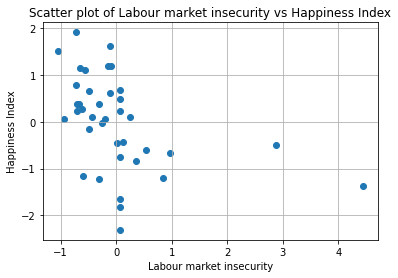

Beta coefficient for Labour market insecurity: -0.42928455267371224


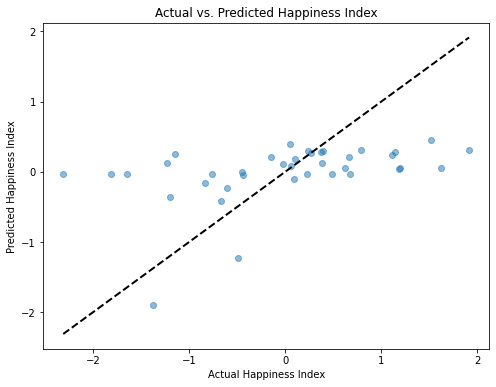

Correlation coefficient: 0.42928455267371207
P-value: 0.007155725883454973



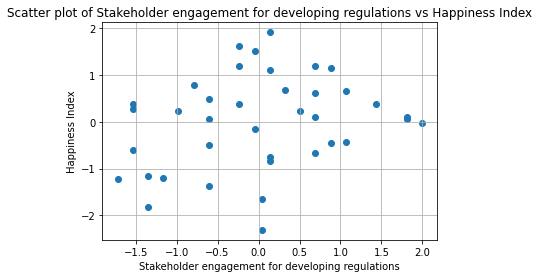

Beta coefficient for Stakeholder engagement for developing regulations: 0.25460296518932357


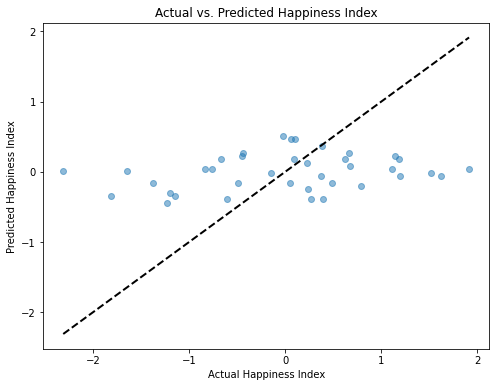

Correlation coefficient: 0.25460296518932357
P-value: 0.12292891477092634



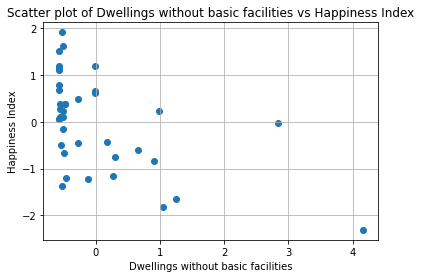

Beta coefficient for Dwellings without basic facilities: -0.5316820631380119


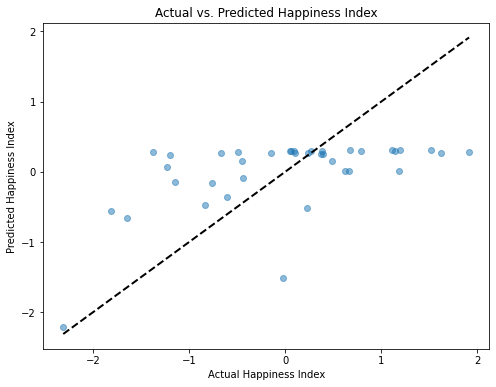

Correlation coefficient: 0.5316820631380117
P-value: 0.000592202857094832



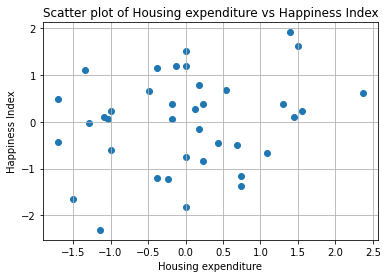

Beta coefficient for Housing expenditure: 0.22641806010574936


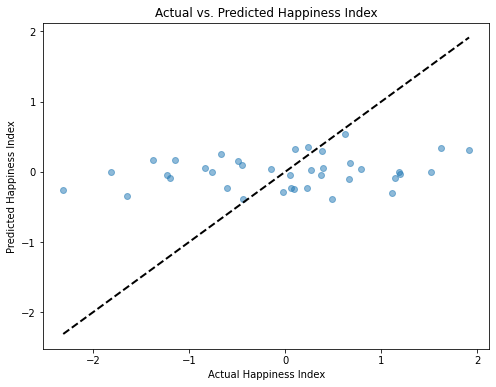

Correlation coefficient: 0.22641806010574925
P-value: 0.17164465588134817



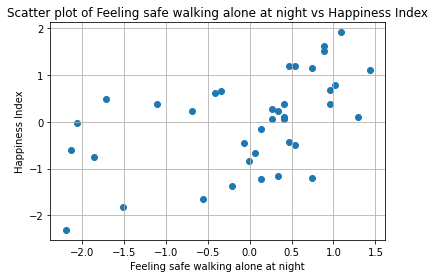

Beta coefficient for Feeling safe walking alone at night: 0.5073975974784136


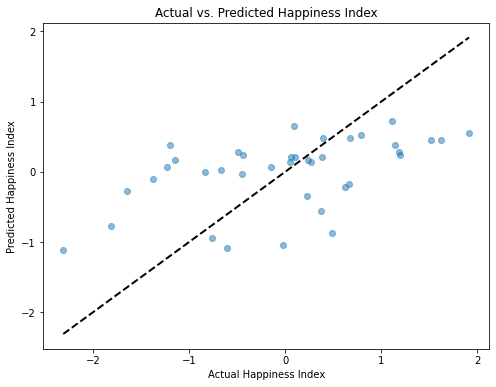

Correlation coefficient: 0.5073975974784135
P-value: 0.001148162482562036



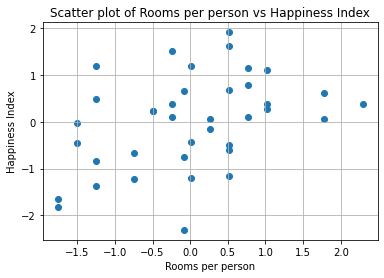

Beta coefficient for Rooms per person: 0.40062463070436116


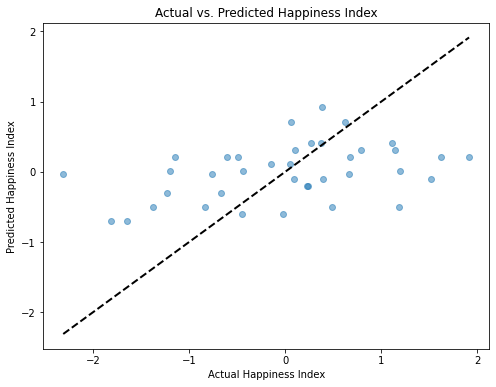

Correlation coefficient: 0.40062463070436116
P-value: 0.012684588667836982



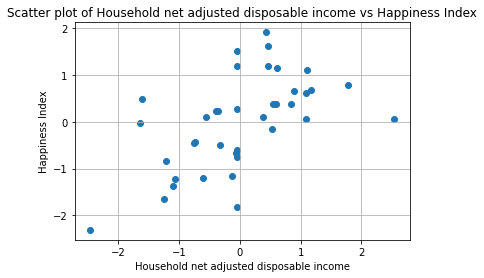

Beta coefficient for Household net adjusted disposable income: 0.5609123542028358


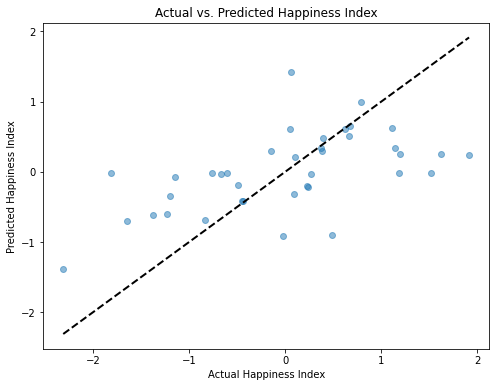

Correlation coefficient: 0.5609123542028358
P-value: 0.00024913392726904



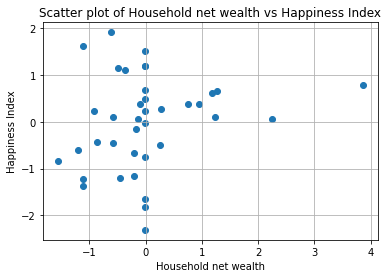

Beta coefficient for Household net wealth: 0.2090196937185374


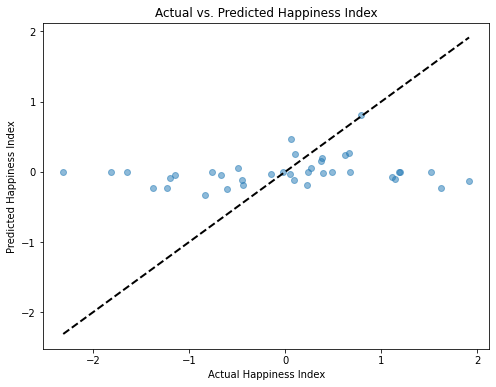

Correlation coefficient: 0.20901969371853737
P-value: 0.20788297482909712



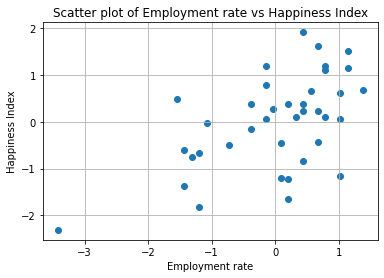

Beta coefficient for Employment rate: 0.561317942808763


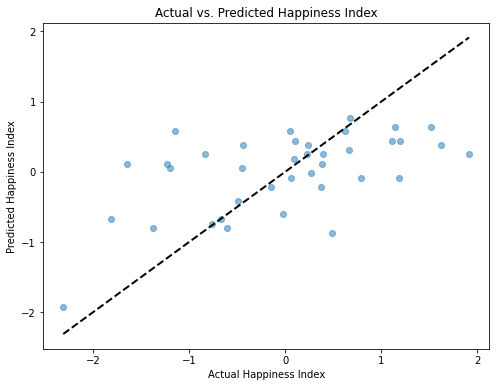

Correlation coefficient: 0.561317942808763
P-value: 0.0002460185006278886



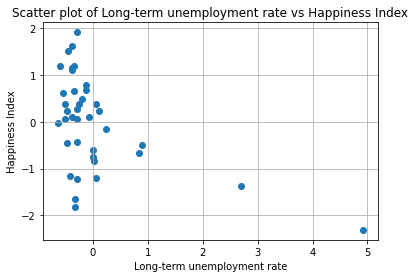

Beta coefficient for Long-term unemployment rate: -0.5169757124654479


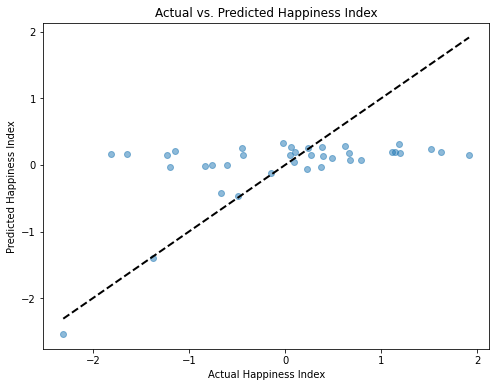

Correlation coefficient: 0.516975712465448
P-value: 0.0008894878535323019



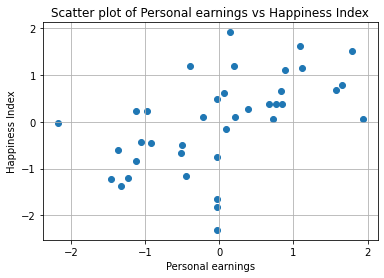

Beta coefficient for Personal earnings: 0.5269561250079295


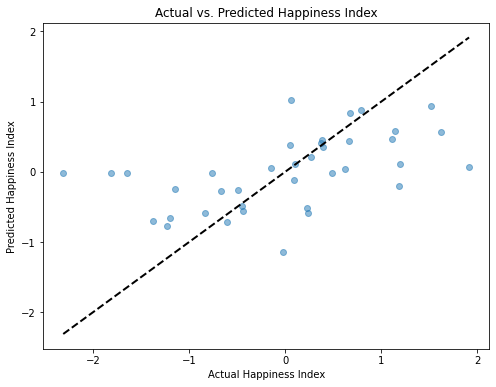

Correlation coefficient: 0.5269561250079292
P-value: 0.0006762653367578325



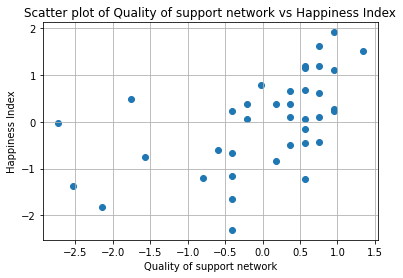

Beta coefficient for Quality of support network: 0.5359644295775035


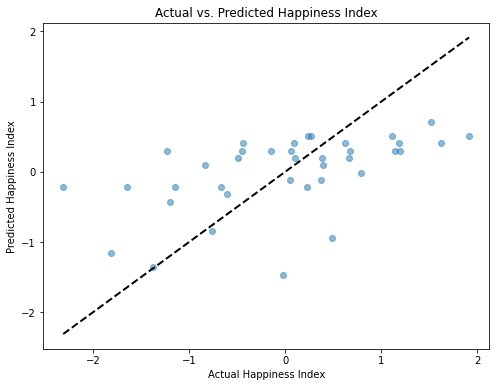

Correlation coefficient: 0.5359644295775037
P-value: 0.0005242064739710058



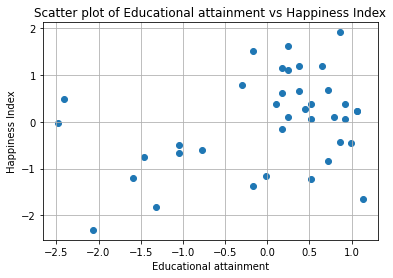

Beta coefficient for Educational attainment: 0.3401714577274972


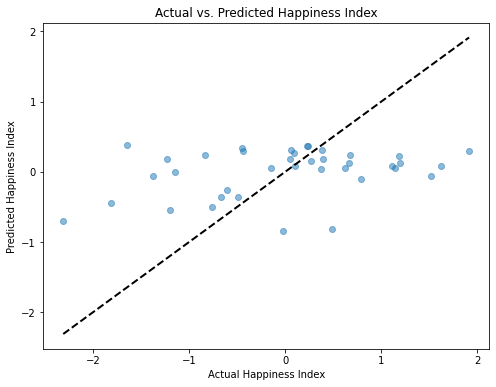

Correlation coefficient: 0.3401714577274972
P-value: 0.03664637200831319



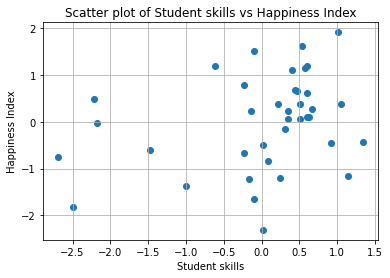

Beta coefficient for Student skills: 0.301934161677498


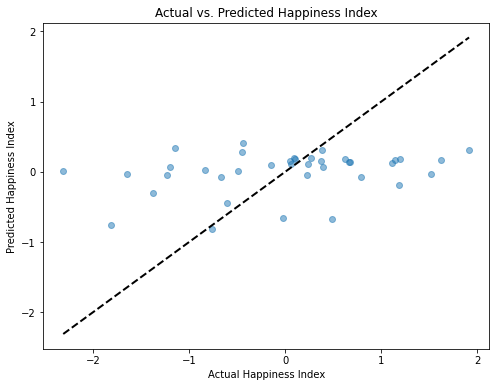

Correlation coefficient: 0.301934161677498
P-value: 0.06542636259018061



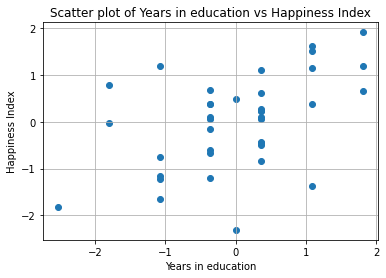

Beta coefficient for Years in education: 0.4852991606368541


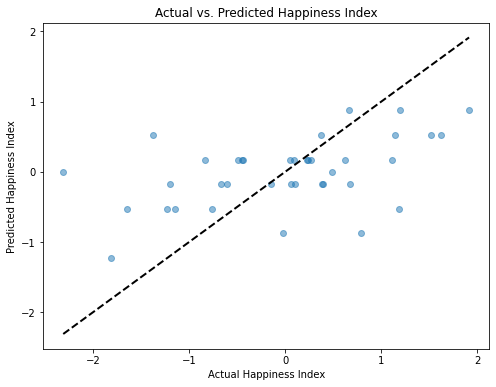

Correlation coefficient: 0.48529916063685397
P-value: 0.0020130634833286963



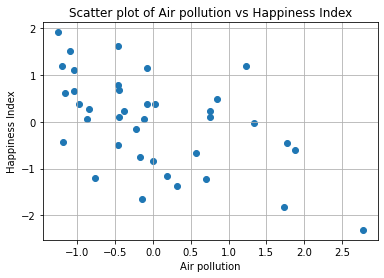

Beta coefficient for Air pollution: -0.5303326849507175


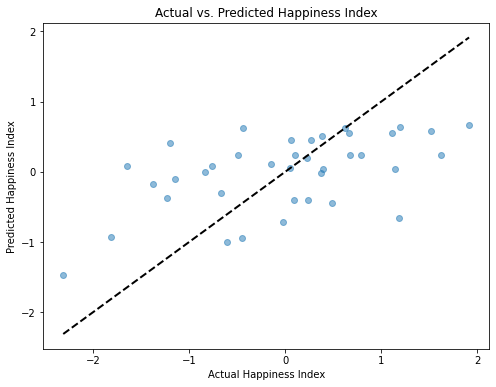

Correlation coefficient: 0.5303326849507176
P-value: 0.0006151994523244552



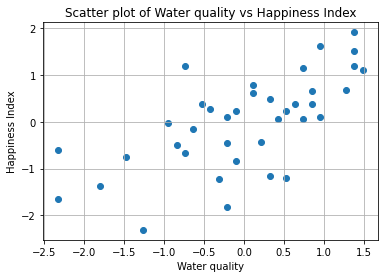

Beta coefficient for Water quality: 0.6600651839559833


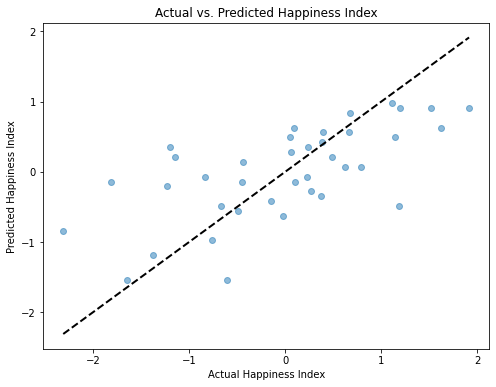

Correlation coefficient: 0.6600651839559835
P-value: 6.528219920611663e-06



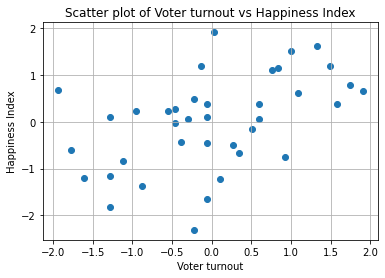

Beta coefficient for Voter turnout: 0.4784102207019526


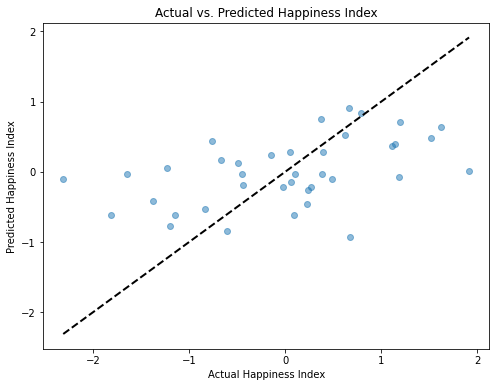

Correlation coefficient: 0.4784102207019526
P-value: 0.0023802867985575032



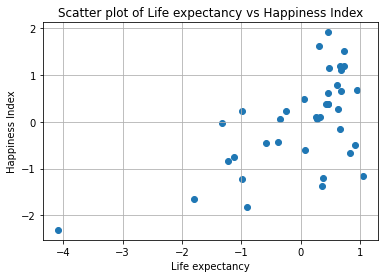

Beta coefficient for Life expectancy: 0.5974690798898524


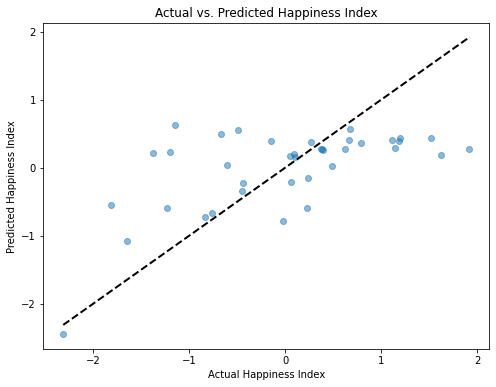

Correlation coefficient: 0.5974690798898522
P-value: 7.480976207049195e-05



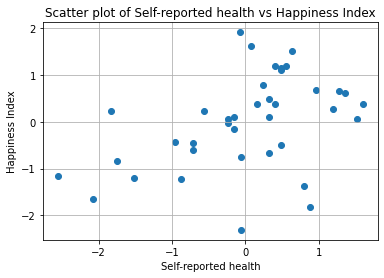

Beta coefficient for Self-reported health: 0.41836907906164633


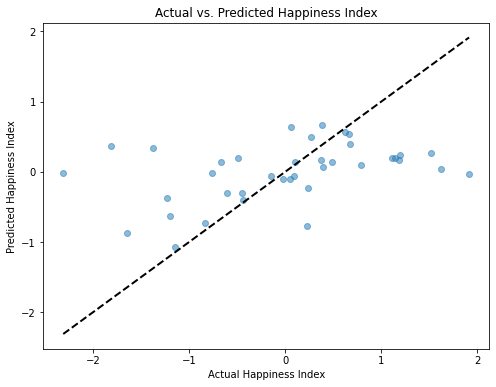

Correlation coefficient: 0.41836907906164633
P-value: 0.008949750293678591



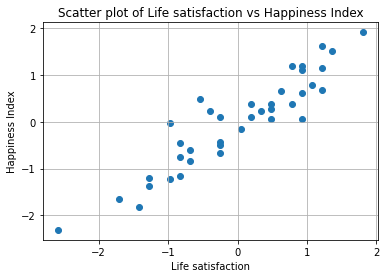

Beta coefficient for Life satisfaction: 0.9255063728391425


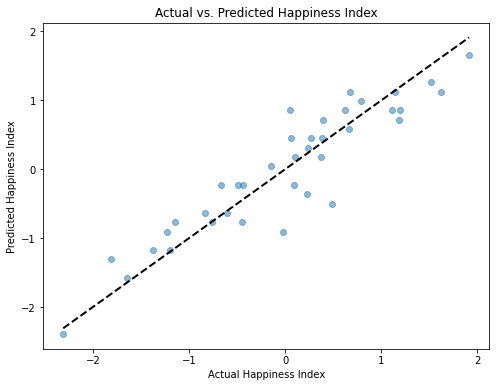

Correlation coefficient: 0.9255063728391427
P-value: 9.385402823903083e-17



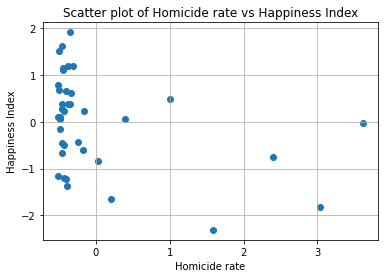

Beta coefficient for Homicide rate: -0.3734930850061583


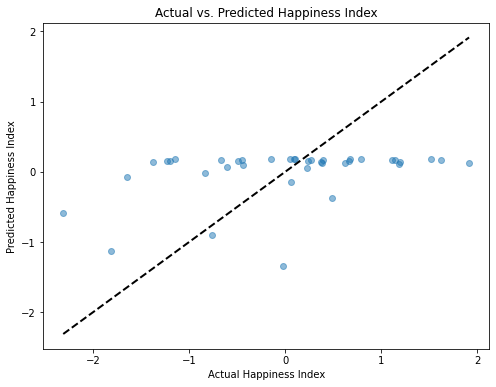

Correlation coefficient: 0.3734930850061582
P-value: 0.020902212021543812



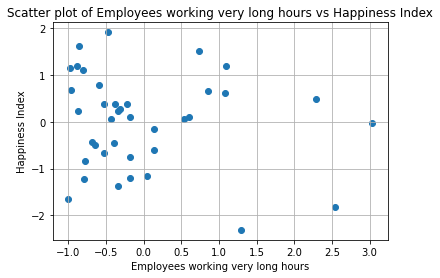

Beta coefficient for Employees working very long hours: -0.13604406619706355


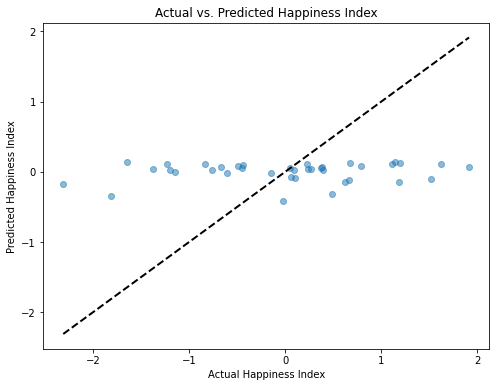

Correlation coefficient: 0.13604406619706366
P-value: 0.41540783582449387



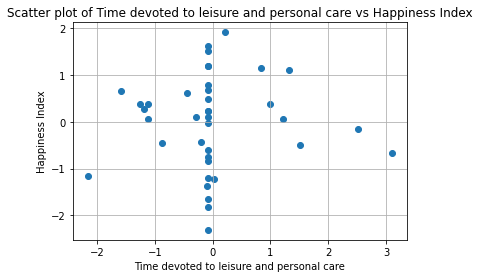

Beta coefficient for Time devoted to leisure and personal care: 0.016374382910033635


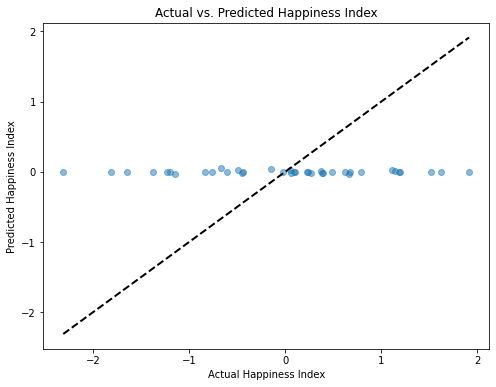

Correlation coefficient: 0.01637438291003368
P-value: 0.9222713346805927



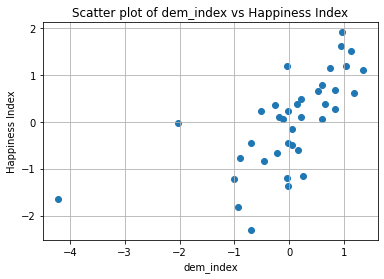

Beta coefficient for dem_index: 0.6445976821882606


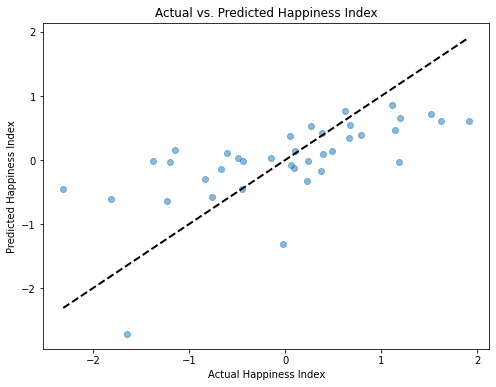

Correlation coefficient: 0.6445976821882603
P-value: 1.2550386913890775e-05



In [130]:
# First dependent variable, Homicide rate
import statsmodels.api as sm
from scipy.stats import pearsonr

# Step 2: Load your dataframe
# Assuming your dataframe is named 'df'
# Example:
# df = pd.read_csv('your_dataframe.csv')

# Step 3: Specify the regression model
# 'happiness_index' is the dependent variable and 'homicide_rate' is the independent variable

for column in X_vals:
    X = zscored_df[column]  # Independent variable
    y = zscored_df['Ladder score']  # Dependent variable
    # Plot data
    plt.scatter(X, y)
    plt.xlabel(f'{column}')
    plt.ylabel('Happiness Index')
    plt.title(f'Scatter plot of {column} vs Happiness Index')
    plt.grid(True)
    plt.show()
    X = sm.add_constant(X)  # Add a constant to the independent variable

    # Step 4: Fit the model
    model = sm.OLS(y, X).fit()

    # Step 5: Print out the summary statistics
    coeffs = model.params
    print(f'Beta coefficient for {column}: {coeffs[column]}')

    # Plot predictions

    # Step 5: Generate predictions
    predictions = model.predict(X)

    # Step 6: Plot predictions versus actual datapoints
    plt.figure(figsize=(8, 6))
    plt.scatter(y, predictions, alpha=0.5)  # Scatter plot of actual vs. predicted
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Add a diagonal line for reference
    plt.title('Actual vs. Predicted Happiness Index')
    plt.xlabel('Actual Happiness Index')
    plt.ylabel('Predicted Happiness Index')
    plt.show()

    # Calculate Pearson correlation coefficient
    correlation_coefficient, p_value = pearsonr(y, predictions)

    print("Correlation coefficient:", correlation_coefficient)
    print("P-value:", p_value)
    print()



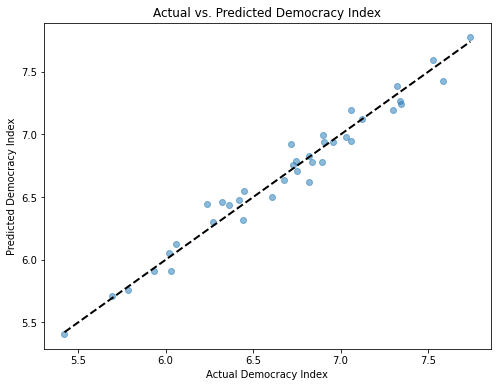

Correlation coefficient: 0.9845204971548258
P-value: 7.954515767275816e-29
const                                                6.689987
Labour market insecurity                            -0.000174
Stakeholder engagement for developing regulations    0.076076
Dwellings without basic facilities                   0.150249
Housing expenditure                                 -0.009883
Feeling safe walking alone at night                  0.116956
Rooms per person                                     0.108456
Household net adjusted disposable income            -0.187149
Household net wealth                                 0.030269
Employment rate                                     -0.174888
Long-term unemployment rate                         -0.171932
Personal earnings                                    0.029949
Quality of support network                          -0.040941
Educational attainment                               0.072388
Student skills                                      -0.21

In [132]:
# First dependent variable, Homicide rate
import statsmodels.api as sm
from scipy.stats import pearsonr

# Step 2: Load your dataframe
# Assuming your dataframe is named 'df'
# Example:
# df = pd.read_csv('your_dataframe.csv')

# Step 3: Specify the regression model
# 'happiness_index' is the dependent variable and 'homicide_rate' is the independent variable

X_vals_no_di = X_vals[:-1]

X = zscored_df[X_vals_no_di]  # Independent variable
y = merged_df['Ladder score']  # Dependent variable
X = sm.add_constant(X)  # Add a constant to the independent variable

# Step 4: Fit the model
model = sm.OLS(y, X).fit()

# Step 5: Print out the summary statistics
coeffs = model.params

# Plot predictions

# Step 5: Generate predictions
predictions = model.predict(X)

# Step 6: Plot predictions versus actual datapoints
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, alpha=0.5)  # Scatter plot of actual vs. predicted
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Add a diagonal line for reference
plt.title('Actual vs. Predicted Democracy Index')
plt.xlabel('Actual Democracy Index')
plt.ylabel('Predicted Democracy Index')
plt.show()

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(y, predictions)

print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)
print(coeffs)
print()

